In [1]:
%matplotlib inline

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from cclyde import Cluster
from distributed import Client, progress
from keras.datasets import mnist
from pprint import pprint

from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.datasets import load_digits


Using Theano backend.
Using gpu device 0: GeForce GTX 960M (CNMeM is disabled, cuDNN 5103)
/home/milesg/anaconda2/envs/clusterclyde/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


# Download MNIST dataset
### Grayscale hand-written digits

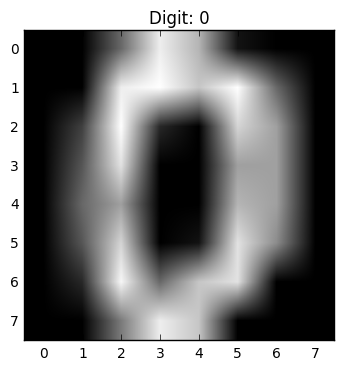

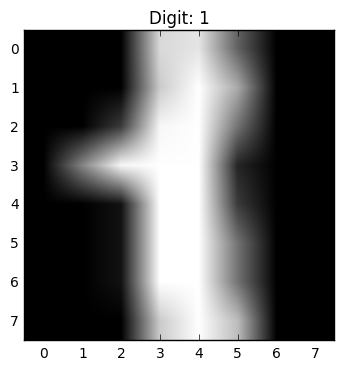

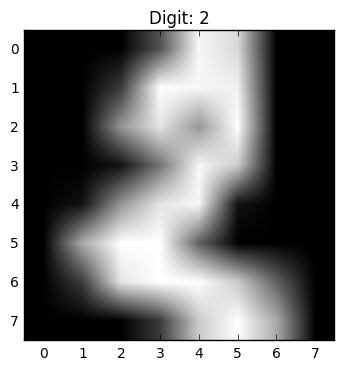

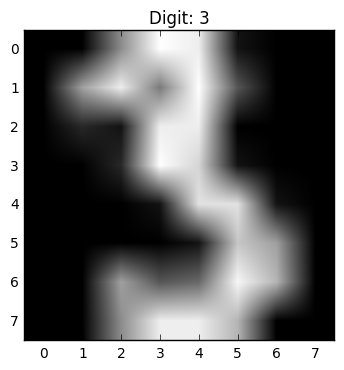

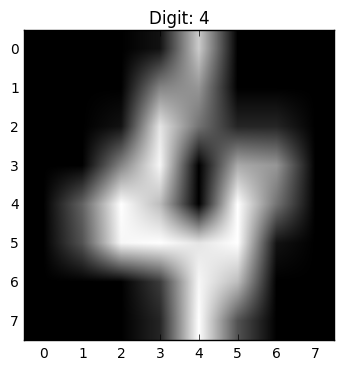

In [2]:
X, y = load_digits(return_X_y=True)
X = np.asarray([x.flatten() for x in X])

for i in range(5):
    plt.imshow(X[i].reshape((8, 8)), cmap='Greys_r')
    plt.title('Digit: {}'.format(y[i]))
    plt.show()

# Train a Linear classfier to predict digits
## This also demonstrates the time problem of adjusting hyper-parameters

---

- Trained with alpha of 0.001...

In [3]:
pca = PCA(n_components=10)

X = pca.fit_transform(X)

from sklearn.linear_model import Perceptron

In [4]:

lr = Perceptron(penalty=None, n_iter=5)

start = time.time()
scores = cross_val_score(estimator=lr,
                         X=X, 
                         y=y,
                         cv=3)

print("Accuracy: {}% (+/- {})".format(round(scores.mean() * 100, 2), round(scores.std(), 3) * 2))
print('Finished in {}sec'.format(round(time.time() - start, 2)))

Accuracy: 72.9% (+/- 0.02)
Finished in 0.04sec


- Trained with alpha of 0.2...

In [5]:
lr = Perceptron(penalty=None, n_iter=15)

start = time.time()
scores = cross_val_score(estimator=lr,
                         X=X, 
                         y=y,
                         cv=3)

print("Accuracy: {}% (+/- {})".format(round(scores.mean() * 100, 2), round(scores.std(), 3) * 2))
print('Finished in {}sec'.format(round(time.time() - start, 2)))

Accuracy: 76.74% (+/- 0.016)
Finished in 0.04sec


## Issue: What hyper params are best? 

Train for all/most?

In [60]:

# Define hyper parameter ranges
penalties = ['l1',]
alphas = np.random.uniform(low=0.0001, high=0.5, size=50)
n_iters = np.random.randint(low=1, high=200, size=100)

# Make a list of all combinations
params = []
for penalty in penalties:
    for alpha in alphas:
        for n_iter in n_iters:
            
            params.append({'penalty': penalty,
                           'alpha': round(alpha, 4),
                           'n_iter': n_iter
                          })
            #params.append((penalty, round(alpha, 4), n_iter))
            

print '{} different combinations.'.format(len(params))
pprint(params[:2])

5000 different combinations.
[{'alpha': 0.4273, 'n_iter': 35, 'penalty': 'l1'},
 {'alpha': 0.4273, 'n_iter': 30, 'penalty': 'l1'}]


# This will take a while, even if using all cores on a local machine; let's distribute the workload

In [5]:
cluster = Cluster(n_nodes=8, instance_type='t2.medium')

Connecting to Boto3 and EC2 resources...Done. 
Ready to configure in preparation to launch cluster! Run: >>> cluster.configure()


In [6]:
cluster.configure()

Checking keypair exists using key_name: "cclyde_default"...
	Found pem_key: "cclyde_default"...Done.
Checking for Cluster Clyde's Virtual Private Cloud (cclyde_vpc) on AWS...
	Found existing VPC...Done.
Checking for Cluster Clyde's Subnet in the VPC...
	Found existing subnet...Done.
Validating security group...Found existing cclyde security group, connecting to it...Done.
Configuring security group...
	Working on permission: tcp from port: 22 to port: 22...already exists! Passing.

	Working on permission: tcp from port: 80 to port: 8786...already exists! Passing.

	Working on permission: tcp from port: 80 to port: 8787...already exists! Passing.

	Working on permission: tcp from port: 0 to port: 65535...already exists! Passing.
Done configuring security group.
Checking for Cluster Clyde's internet gateway...found existing cclyde gateway...Done.
Attaching internet gateway to VPC if needed...gateway already associated with VPC...Done.
Confirming proper VPC route table configuration...Fou

In [8]:
cluster.terminate_cluster()

In [11]:
cluster.launch_instances()

Cluster-Clyde - WARNING - 	Once instances are running, you may be accumulating charges from AWS; be sure to run cluster.stop_cluster() *AND* confirm instances are stopped/terminated via AWS console!


All instances in running state, waiting for all to be reachable...
All 8 instances ready!
Setting node names...Done.
Installing Anaconda on cluster...



paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Authentication (publickey) successful!
paramiko.transport - INFO - Authentication (publickey) successful!
paramiko.transport - INFO - Authentication (publickey) successful!
paramiko.transport - INFO - Authentication (publickey) successful!
paramiko.transport - INFO - Authentication (publickey) successful!
paramiko.transport - INFO - Authentication (publickey) successful!
parami

Done.

In [12]:
cluster.install_python_packages(['keras', 'scikit-learn', 'numpy', 'pandas', 'dask'], method='conda')
cluster.install_python_packages(['futures', 'git+git://github.com/dask/distributed.git'])


Installing package: keras

paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Authentication (publickey) successful!
paramiko.transport - INFO - Authentication (publickey) successful!
paramiko.transport - INFO - Authentication (publickey) successful!
paramiko.transport - INFO - Authentication (publickey) successful!
paramiko.transport - INFO - Authentication (publickey) successful!
paramiko.transport - INFO - Authentication (publickey) successful!
parami


----------
cclyde_node-master 	Exit code: 0

----------
cclyde_node-1 	Exit code: 0

----------
cclyde_node-2 	Exit code: 0

----------
cclyde_node-3 	Exit code: 0

----------
cclyde_node-4 	Exit code: 0

----------
cclyde_node-5 	Exit code: 0

----------
cclyde_node-6 	Exit code: 0

----------
cclyde_node-7 	Exit code: 0

Installing package: scikit-learn

paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Authentication (publickey) successful!
paramiko.transport - INFO - Authentication (publickey) successful!
paramiko.transport - INFO - Authentication (publickey) successful!
paramiko.transport - INFO - Authentication (publickey) successful!
paramiko.transport - INFO - Authentication (publickey) successful!
paramiko.transport - INFO - Authentication (publickey) successful!
parami


----------
cclyde_node-master 	Exit code: 0

----------
cclyde_node-1 	Exit code: 0

----------
cclyde_node-2 	Exit code: 0

----------
cclyde_node-3 	Exit code: 0

----------
cclyde_node-4 	Exit code: 0

----------
cclyde_node-5 	Exit code: 0

----------
cclyde_node-6 	Exit code: 0

----------
cclyde_node-7 	Exit code: 0

Installing package: numpy

paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Authentication (publickey) successful!
paramiko.transport - INFO - Authentication (publickey) successful!
paramiko.transport - INFO - Authentication (publickey) successful!
paramiko.transport - INFO - Authentication (publickey) successful!
paramiko.transport - INFO - Authentication (publickey) successful!
paramiko.transport - INFO - Authentication (publickey) successful!
parami


----------
cclyde_node-master 	Exit code: 0

----------
cclyde_node-1 	Exit code: 0

----------
cclyde_node-2 	Exit code: 0

----------
cclyde_node-3 	Exit code: 0

----------
cclyde_node-4 	Exit code: 0

----------
cclyde_node-5 	Exit code: 0

----------
cclyde_node-6 	Exit code: 0

----------
cclyde_node-7 	Exit code: 0

Installing package: pandas

paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Authentication (publickey) successful!
paramiko.transport - INFO - Authentication (publickey) successful!
paramiko.transport - INFO - Authentication (publickey) successful!
paramiko.transport - INFO - Authentication (publickey) successful!
paramiko.transport - INFO - Authentication (publickey) successful!
paramiko.transport - INFO - Authentication (publickey) successful!
parami


----------
cclyde_node-master 	Exit code: 0

----------
cclyde_node-1 	Exit code: 0

----------
cclyde_node-2 	Exit code: 0

----------
cclyde_node-3 	Exit code: 0

----------
cclyde_node-4 	Exit code: 0

----------
cclyde_node-5 	Exit code: 0

----------
cclyde_node-6 	Exit code: 0

----------
cclyde_node-7 	Exit code: 0

Installing package: dask

paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Connected (version 2.0, client OpenSSH_7.2p2)
paramiko.transport - INFO - Authentication (publickey) successful!
paramiko.transport - INFO - Authentication (publickey) successful!
paramiko.transport - INFO - Authentication (publickey) successful!
paramiko.transport - INFO - Authentication (publickey) successful!
paramiko.transport - INFO - Authentication (publickey) successful!
paramiko.transport - INFO - Authentication (publickey) successful!
parami


----------
cclyde_node-master 	Exit code: 0

----------
cclyde_node-1 	Exit code: 0

----------
cclyde_node-2 	Exit code: 0

----------
cclyde_node-3 	Exit code: 0

----------
cclyde_node-4 	Exit code: 0

----------
cclyde_node-5 	Exit code: 0

----------
cclyde_node-6 	Exit code: 0

----------
cclyde_node-7 	Exit code: 0


True

In [80]:
cluster.launch_dask()

Installing dask.distributed on cluster

Node: cclyde_node-master exit code: 0
Node: cclyde_node-1 exit code: 0
Node: cclyde_node-2 exit code: 0
Node: cclyde_node-3 exit code: 0
Node: cclyde_node-4 exit code: 0
Node: cclyde_node-5 exit code: 0
Node: cclyde_node-6 exit code: 0
Node: cclyde_node-7 exit code: 0
Launching scheduler on master node...Done.

Launching workers...Done.

Scheduler should be available here: 52.23.206.28:8786
Web Dashboard should be available here: 52.23.206.28:8787

# Define function which will initialize model with given params, train, test and send back the score.

In [81]:
def model_tester(kwargs):
    """
    Function which is mapped to cluster. Passes kwargs to model to be trained.
    Returns score based on those kwargs.
    """
    
    # Do imports in function, because this will be mapped across 
    # entirely new instances
    import time
    import json
    import numpy as np
    from sklearn.linear_model import Perceptron
    from sklearn.model_selection import cross_val_score
    from sklearn.decomposition import PCA
    from sklearn.datasets import load_digits

    X, y = load_digits(return_X_y=True)
    X = np.asarray([x.flatten() for x in X])
    pca = PCA(n_components=40)
    X = pca.fit_transform(X)
    
    # Initialize model with given kwargs
    lr = Perceptron(**kwargs)
    scores = cross_val_score(estimator=lr,
                             X=X, 
                             y=y,
                             cv=2)
    kwargs.update({'score': scores.mean(),
                   'std': scores.std()})
    return kwargs


def double(n):
    '''
    Useless worker function # 1
    '''
    import time
    import random
    import sklearn
    time.sleep(random.random())
    return n * 2, 2


def add_two(package):
    """
    Useless worker function # 2
    """
    n, n2 = package
    import time
    import random
    time.sleep(random.random())
    return n + n2
    

In [82]:
c = Client(address='52.23.206.28:8786')
c.restart()

<Client: scheduler="52.23.206.28:8786" processes=14 cores=28>

In [83]:
futures = c.map(double, range(200))
futures = c.map(add_two, futures)
progress(futures)

In [64]:
futures = c.map(model_tester, params)
progress(futures)

In [65]:
results = c.gather(futures)

In [66]:
df = pd.DataFrame(results)
df.head()

,alpha,n_iter,penalty,score,std
0,0.4273,35,l1,0.317136,0.021377
1,0.4273,30,l1,0.381102,0.031772
2,0.4273,3,l1,0.418655,0.064604
3,0.4273,167,l1,0.416690,0.041690
4,0.4273,32,l1,0.428073,0.049605


In [67]:
import plotly.plotly as py
import plotly.graph_objs as go

In [68]:
temp = df[df.penalty == 'l1']

trace1 = go.Scatter(
    x = temp.n_iter,
    y = temp.alpha,
    mode='markers',
    name=temp.penalty,
    marker=dict(
        size='16',
        color = temp.score, #set color equal to a variable
        colorscale='Viridis',
        showscale=True
    )
)
data = [trace1]

layout = dict(title = 'Best performing models.',
              yaxis = dict(zeroline = False, title='Alpha'),
              xaxis = dict(zeroline = False, title='Iterations')
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')


# Also create a distributed queue system...

In [90]:
from Queue import Queue
local_q = Queue()
remote_q = c.scatter(local_q)

def long_calc1(n):
    
    import time
    import random
    
    time.sleep(random.random())
    
    return n + 2

def long_calc2(n):
    
    import time
    import random
    
    time.sleep(random.random())
    
    return n * 2

def long_calc3(n):
    
    import time
    import random
    
    time.sleep(random.random())
    
    return n - 2


long_calc1_q = c.map(long_calc1, remote_q)
long_calc2_q = c.map(long_calc2, long_calc1_q)
long_calc3_q = c.map(long_calc3, long_calc2_q)
result_q = c.gather(long_calc3_q)



In [91]:
result_q.qsize()

0

In [92]:
jobs = range(500)

for job in jobs:
    time.sleep(random.random())
    local_q.put(job)

In [ ]:
while True:
    print result_q.get()

1846
1848
1850
1852
1854
1856
1858
1860
1862
1864
1866
1868
1870
1872
1874
1876
1878
1880
1882
1884
1886
1888
1890
1892
1894
1896
1898
1900
1902
1904
1906
1908
1910
1912
1914
1916
1918
1920
1922
1924
1926
1928
1930
1932
1934
1936
1938
1940
1942
1944
1946
1948
1950
1952
1954
1956
1958
1960
1962
1964
1966
1968
1970
1972
1974
1976
1978
1980
1982
1984
1986
1988
1990
1992
1994
1996
1998
2000
